In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/BankNote.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns 

In [6]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]

In [7]:
pca = PCA(n_components = 2)
pca.fit(X)
data_pca = pca.transform(X)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-8.117954,-2.372615
1,-7.800124,-2.689555
2,3.690195,-4.372720
3,-9.908612,-0.978030
4,6.957545,-0.733813


<AxesSubplot: >

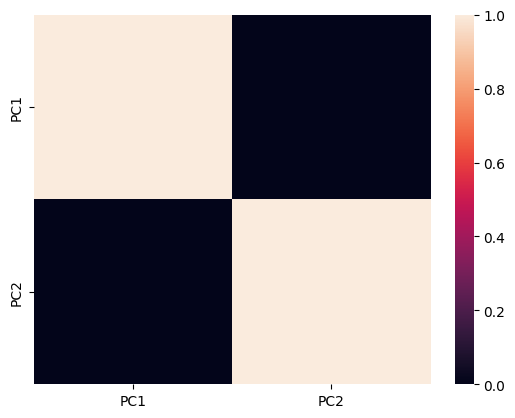

In [8]:
sns.heatmap(data_pca.corr())


2

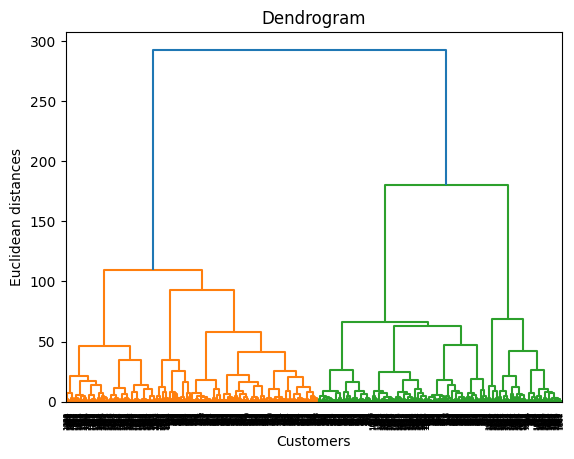

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/si

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


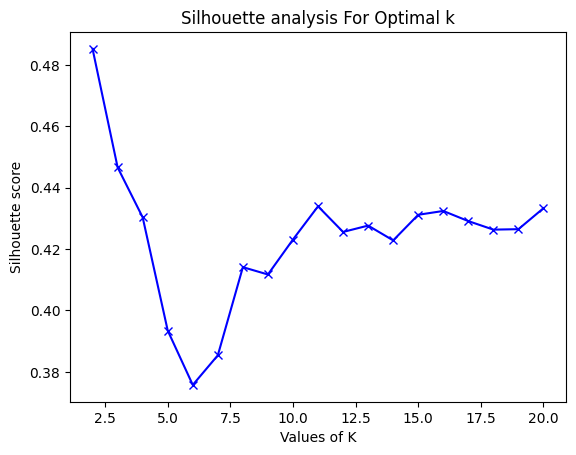

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_avg = []
for num_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_pca)
    cluster_labels = kmeans.fit_predict(data_pca)
    silhouette_avg.append(silhouette_score(data_pca, cluster_labels))
plt.plot([i for i in range(2, 21)],silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

n_clusters = 20 seems best!

4

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


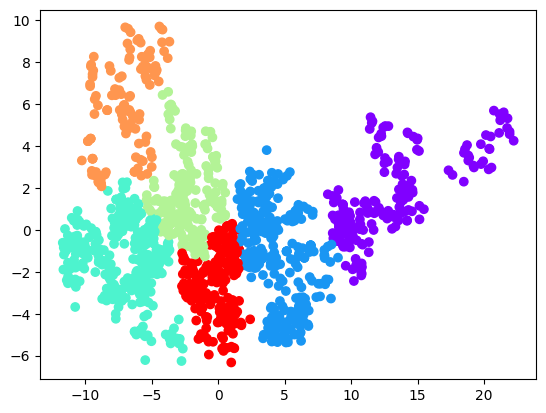

In [13]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(data_pca)
data_with_clusters = data_pca.copy()
plt.scatter(data_with_clusters['PC1'],data_with_clusters['PC2'],c=y_hc,cmap='rainbow')

5

6

In [14]:
from yellowbrick.cluster import KElbowVisualizer

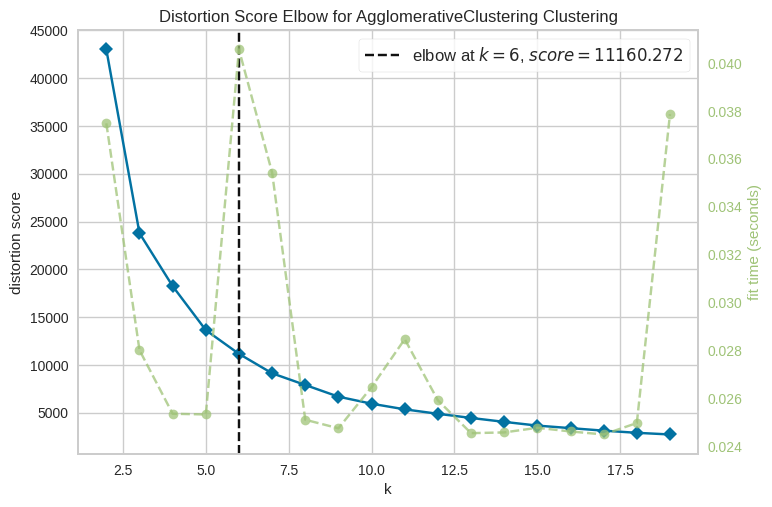

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(data_pca)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

k=6

7

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/nilsa/.local/lib/python3.10/si

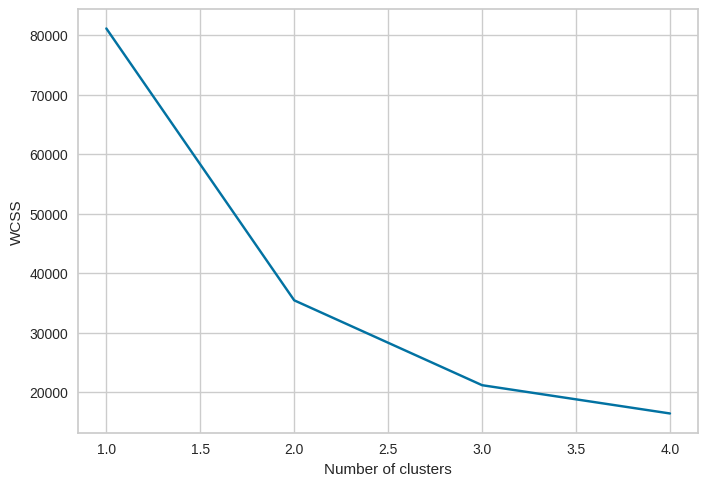

/home/nilsa/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
from sklearn.cluster import KMeans
import logging, sys

# Using the elbow method to find the optimal number of clusters 
wcss = [] 
for k in range(1,5): 
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca) 
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 5), wcss) 
plt.xlabel('Number of clusters') 

y_kmeans = kmeans.fit_predict(data_pca)

plt.ylabel('WCSS') 
plt.show() # Training the K-Means model on the dataset 
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) 
logging.disable(sys.maxsize)
y_kmeans = kmeans.fit_predict(data_pca)

8

In [17]:
from sklearn.manifold import TSNE

In [18]:
import seaborn as sn

In [19]:
standardized_data = StandardScaler().fit_transform(X)

In [20]:
model = TSNE(n_components= 2, random_state  =0 )

In [21]:
tsne_data = model.fit_transform(standardized_data)

In [22]:
tsne_df = pd.DataFrame(tsne_data, columns = ['C1', 'C2'])

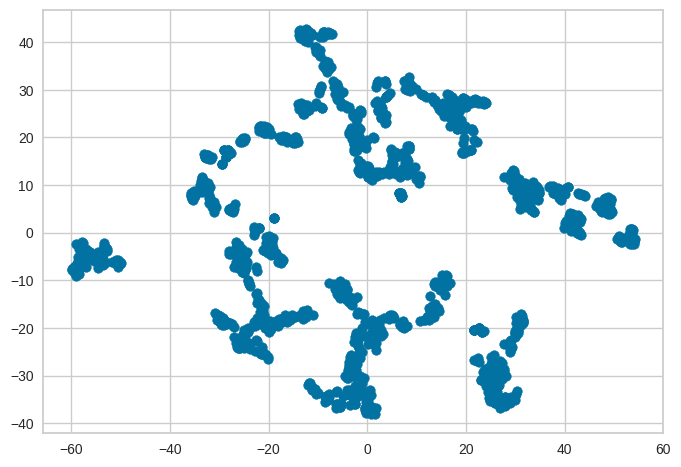

In [23]:
plt.scatter(tsne_df['C1'],tsne_df['C2'])

9

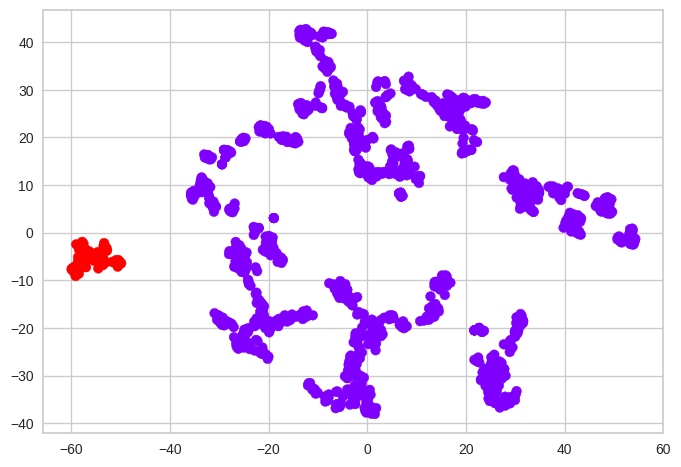

In [24]:
from sklearn.cluster import DBSCAN
import numpy as np
DBSCAN_cluster = DBSCAN(eps=10, min_samples=5).fit(tsne_df) 
dby = DBSCAN_cluster.labels_
plt.scatter(tsne_df['C1'],tsne_df['C2'],c=dby,cmap='rainbow')

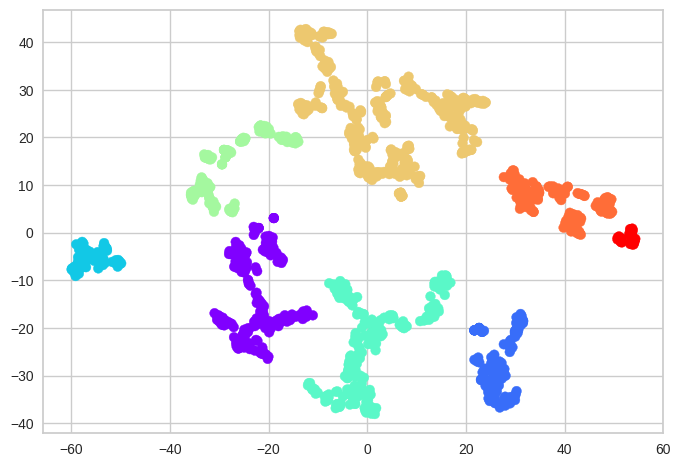

In [25]:
DBSCAN_cluster = DBSCAN(eps=5, min_samples=5).fit(tsne_df) 
dby = DBSCAN_cluster.labels_
plt.scatter(tsne_df['C1'],tsne_df['C2'],c=dby,cmap='rainbow')

eps must be 5. min_samples can differ and for the amounts of min_samplels 1 to 5, there is no change in the result of the clustering. the bigger the eps, the biggest and less clusters.

10

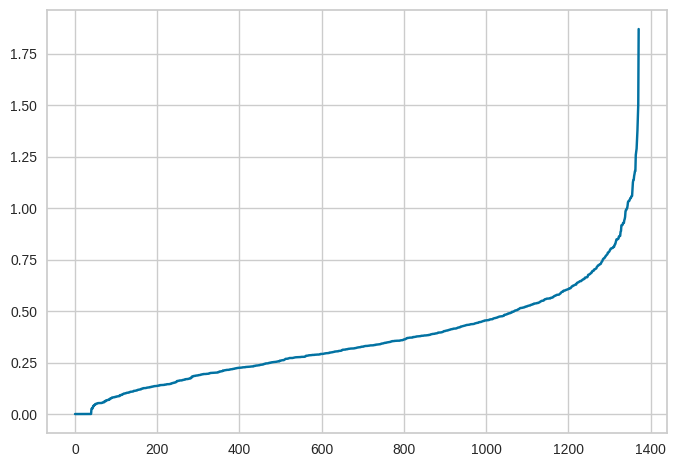

In [26]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(tsne_df)
distances, indices = neighbors_fit.kneighbors(tsne_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
# plt.xlim(0,200)
plt.plot(distances)

min_samples = 1 or 2 is optimal